In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms
import bcd.helpers as helpers
from bcd.ModelBCD import ModelBCD

%load_ext autoreload
%autoreload 2



In [2]:
# Convert to tensor and scale to [0, 1]
ts = transforms.Compose([transforms.ToTensor(),
                         transforms.Normalize((0,), (1,))])
mnist_trainset = datasets.MNIST(root='data', train=True, download=True, transform=ts)
mnist_testset = datasets.MNIST(root='data', train=False, download=True, transform=ts)


In [4]:
x_train, y_train, y_train_1hot, x_test, y_test, y_test_1hot = helpers.preprocess_data(mnist_trainset, mnist_testset)

In [5]:
y_train_1hot.size()

torch.Size([60000, 10])

In [69]:
def convert_to_one_hot_labels(input, target):
    tmp = input.new_zeros(target.size(0), target.max() + 1)
    tmp.scatter_(1, target.view(-1, 1), 1.0)
    return tmp

In [75]:
test = convert_to_one_hot_labels(x_train, y_train)

In [96]:
y_train.max().item()+1

10

In [6]:
y_test_1hot.size()

torch.Size([10, 10000])

In [41]:
x_t = torch.empty((60000, 1 * 28 * 28))

In [42]:
x_t[0, :] = mnist_trainset[0][0].reshape(1, 1 * 28 * 28)


In [64]:
x_train.size()

torch.Size([60000, 784])

In [4]:
gamma = alpha = rho = 1
classes = 10
input_layer_size, n_samples_train = x_train.size()
n_samples_test = x_test.size()[1]

# Layers: input + 3 hidden + output
layer_1_size = layer_2_size = layer_3_size = 200

In [14]:
w1 = 0.01*torch.randn(100, 10)
b1 = torch.ones(100, 1)
x = torch.randn(100)

In [31]:
b1.repeat(1, 100).size()

torch.Size([100, 100])

In [19]:
model = ModelBCD(input_layer_size, layer_1_size, layer_2_size, layer_3_size, classes, gamma, alpha, rho)

In [20]:
n_iter = 5
n_epochs = 10
loss = np.empty(n_iter)
accuracies_train = np.empty(n_iter)
accuracies_test = np.empty(n_iter)
loss_test = np.empty(n_iter)

model.init_aux_params(x_train)


In [21]:
y_train_1hot.size()

torch.Size([10, 60000])

In [22]:
# TODO add time measurements

print('Train on', n_samples_train, 'samples, validate on', n_samples_test, 'samples')
for k in range(n_iter):
    model = ModelBCD(input_layer_size, layer_1_size, layer_2_size, layer_3_size, classes, gamma, alpha, rho)
    for e in range(n_epochs)
        model.update_params(y_train_1hot, x_train)

        train_output = model.forward(x_train)

        # training prediction
        pred_train = torch.argmax(train_output, dim=0)

        test_output = model.forward(x_test)

        # test/validation prediction
        pred_test = torch.argmax(test_output, dim=0)

        # compute training loss
        loss[k] = torch.pow(torch.dist(model.V4, y_train_1hot, 2), 2)
        loss_test[k] = torch.pow(torch.dist(test_output, y_test_1hot, 2), 2)

        # compute training accuracy
        correct_train = pred_train == y_train
        accuracies_train[k] = np.mean(correct_train.numpy())

        # compute validation accuracy
        correct_test = pred_test == y_test
        accuracies_test[k] = np.mean(correct_test.numpy())

    # print results
    print(
        f"Epoch: {k + 1} / {n_iter} \n loss: {loss[k]:.4f} - acc:{accuracies_train[k]:.4f} - val_acc:{accuracies_test[k]:.4f}")


Train on 60000 samples, validate on 10000 samples
Epoch: 1 / 60 
 loss: 27181.9844 - acc:0.5105 - val_acc:0.5207
Epoch: 2 / 60 
 loss: 15298.0088 - acc:0.8046 - val_acc:0.8192
Epoch: 3 / 60 
 loss: 9286.0391 - acc:0.8376 - val_acc:0.8462
Epoch: 4 / 60 
 loss: 5709.7236 - acc:0.8458 - val_acc:0.8533
Epoch: 5 / 60 
 loss: 3526.5623 - acc:0.8501 - val_acc:0.8576
Epoch: 6 / 60 
 loss: 2179.9231 - acc:0.8522 - val_acc:0.8595
Epoch: 7 / 60 
 loss: 1351.2394 - acc:0.8536 - val_acc:0.8613
Epoch: 8 / 60 
 loss: 838.8889 - acc:0.8544 - val_acc:0.8620
Epoch: 9 / 60 
 loss: 521.7051 - acc:0.8548 - val_acc:0.8624
Epoch: 10 / 60 
 loss: 324.7456 - acc:0.8548 - val_acc:0.8625
Epoch: 11 / 60 
 loss: 202.4896 - acc:0.8548 - val_acc:0.8629
Epoch: 12 / 60 
 loss: 126.3958 - acc:0.8551 - val_acc:0.8628
Epoch: 13 / 60 
 loss: 78.9371 - acc:0.8555 - val_acc:0.8628
Epoch: 14 / 60 
 loss: 49.3827 - acc:0.8556 - val_acc:0.8631
Epoch: 15 / 60 
 loss: 30.9339 - acc:0.8553 - val_acc:0.8632
Epoch: 16 / 60 
 loss: 

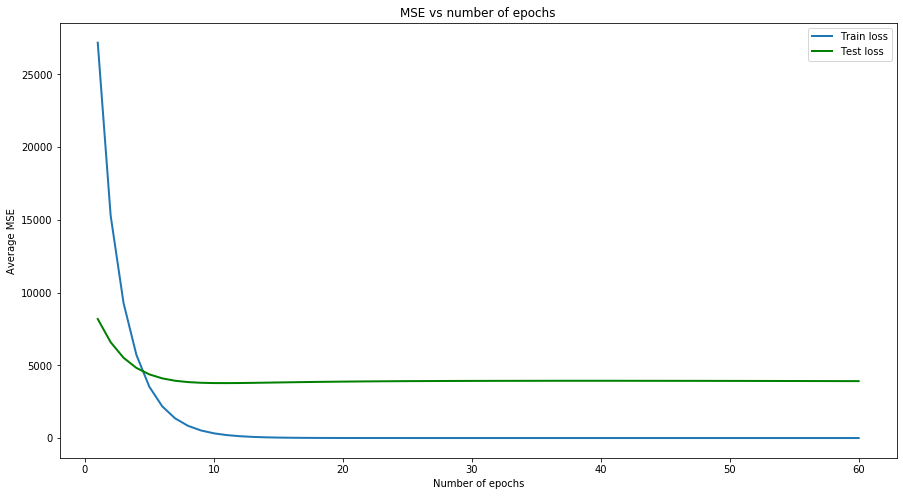

In [23]:
helpers.plot_losses(loss, loss_test, n_iter)